# Assignment 2 - DIY LINEAR REGRESSOR!

*This assignment is a part of the project ["Customer Churn Analysis: From Data To Strategy"]*


1.   ## Part-1
In this part, you'll build your own linear regression from scratch by 2 methods that were discuseed in class.

  * OLS (Ordinary Least Square) - This method directly calculates the values of the coefficients in equation y=mx+c.
  * Gradient Descent - This method uses an iterative approach to calculate the values of the coefficients. You'll have to calculate the values of both m and b.
2.   ## Part-2
In this part, you'll get predictions from the model you just built. You'll then evaluate the predictions by following metrics:

    * [R2 Score](https://www.investopedia.com/terms/r/r-squared.asp)
    * [MEAN ABSOLUTE ERROR and ROOT MEAN SQUARED ERROR](https://towardsdatascience.com/what-are-rmse-and-mae-e405ce230383)
3.  ## Part-3
In this part, you'll have to answer some subjective questions.







If you are stuck or have any doubts, please feel free to put your queries on the Whatsapp group.


Deadline : **31 May, 11:59 pm**


# Import necessary libraries
Feel free to modify it as per your requirements.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Part-1


### Linear Regressor with OLS method

In [12]:
class MyLRFromOLS:

    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        # Calculate the mean of X and y
        X_mean = X_train.mean()
        y_mean = y_train.mean()

        # Calculate the values of m and b
        num = 0
        den = 0
        for i in range(X_train.shape[0]):
            num += (X_train[i] - X_mean) * (y_train[i] - y_mean)
            den += (X_train[i] - X_mean) ** 2

        self.m = num / den
        self.b = y_mean - (self.m * X_mean)

        print("m: ", self.m)
        print("b: ", self.b)

    def predict(self, X_test):
        return self.m * X_test + self.b

    def get_coeff(self):
        print("m:", self.m)
        print("b:", self.b)

In [13]:
#load dataset
from google.colab import drive
drive.mount("/content/drive")
df=pd.read_csv("/content/drive/MyDrive/tvmarketing.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [14]:
# Separate input and output columns
X = df.iloc[:,0].values
y = df.iloc[:,1].values


In [15]:
X

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [16]:
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [17]:
# Train test split of 80/20. Try changing the ratio and see what results you get

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

  ### Prediction time

In [18]:
olslr = MyLRFromOLS()


In [20]:
olslr.fit(X_train,y_train)

m:  0.052458280858028235
b:  6.566524608650462


In [21]:
olslr_pred = olslr.predict(X_test)

In [22]:
#View predictions
olslr_pred

array([15.78344456, 10.27007924,  9.51467999, 18.7420916 , 15.31656586,
       16.70146447, 10.03401697, 20.34731499, 10.5061415 , 21.81614685,
        7.81503169, 17.98669235, 11.68120699,  6.9756992 , 18.23324627,
        7.46880704,  7.88322746, 14.51395416, 17.56178028, 17.27325973,
       18.54275013, 20.35780665,  9.58287576,  8.50223517, 18.86799147,
       15.40049911, 15.75196959, 10.18614599, 18.48504602, 18.31717952,
       21.08173092, 13.44380523, 17.04768912, 13.71134246,  6.84979933,
       12.32644385, 18.12308388, 19.59716157, 20.47846069, 16.14540669])

In [23]:
#Get values of m and b
olslr.get_coeff()

m: 0.052458280858028235
b: 6.566524608650462


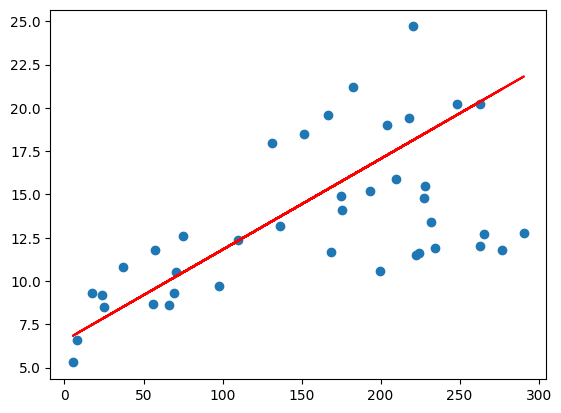

In [47]:
plt.scatter(X_test,y_test)
plt.plot(X_test,olslr_pred,c='r')
plt.show()

### Linear Regressor with gradient descent


In [24]:
class MyLRFromGD:

  def __init__(self,learning_rate,epochs):
    self.m = 10 #assign random value
    self.b  = 10 #assign random value
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self,X_train,y_train):
      # calcualte b and m using GD
    p = len(X_train)
    for i in range(self.epochs):

      y_pred = self.m * X_train + self.b

      # Calculate slope wrt b and m
      loss_slope_b = (-2/p) * np.sum(y_train - y_pred)
      loss_slope_m = (-2/p) * np.sum(X_train * (y_train - y_pred))

      self.b = self.b - (self.lr * loss_slope_b)
      self.m = self.m - (self.lr * loss_slope_m)


  def predict(self,X_test):
    return self.m * X_test + self.b

  def get_coeff(self):
    return self.m, self.b
    #Write code to get values of m and b


### Prediction Time
Since we have already split the dataset, we're not going to repeat it again.

In [39]:
#Check with different values of learning_rate and epochs for model convergence
gdlr = MyLRFromGD(0.0000001,10000)

In [40]:
gdlr.fit(X_train,y_train)

In [43]:
gdlr_pred = gdlr.predict(X_test)

In [44]:
# View predictions
gdlr_pred

array([16.12318347, 12.42886439, 11.92269699, 18.10567249, 15.81034389,
       16.73831748, 12.27068708, 19.18127824, 12.58704171, 20.16549265,
       10.78382031, 17.59950508, 13.37441324, 10.22141208, 17.7647125 ,
       10.55182692, 10.82951598, 15.27254102, 17.31478592, 17.12145809,
       17.97210054, 19.18830834, 11.96839265, 11.24429205, 18.19003373,
       15.86658472, 16.10209316, 12.37262357, 17.93343497, 17.82095333,
       19.67338544, 14.55547052, 16.97031087, 14.73473815, 10.13705085,
       13.80676456, 17.69089642, 18.67862588, 19.26915452, 16.36572202])

In [45]:
# Get values of m and b
gdlr.get_coeff()

(0.035150514540667574, 9.947238068126435)

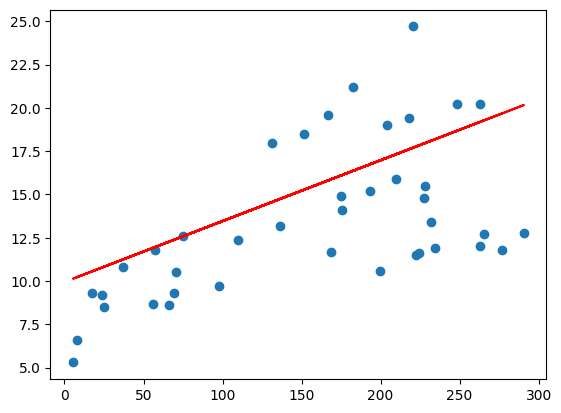

In [46]:
plt.scatter(X_test,y_test)
plt.plot(X_test,gdlr_pred,c='r')
plt.show()

In [ ]:
# Compare values of m and b obtained from both methods

# Part-2

### R2 Score
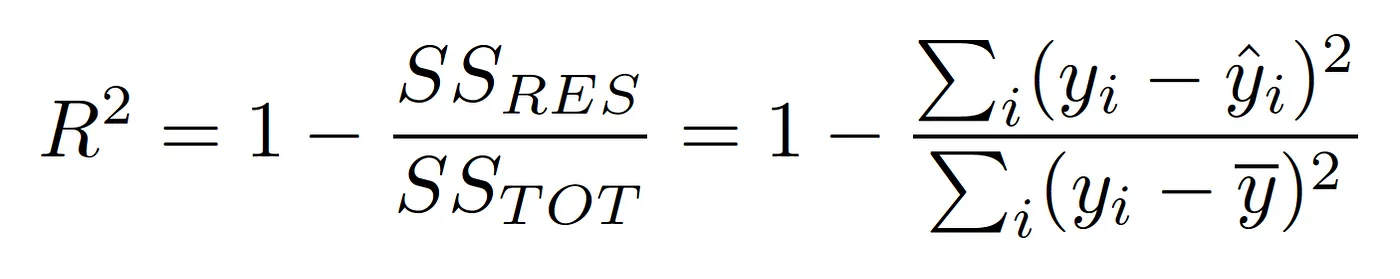

### MEAN ABSOLUTE ERROR
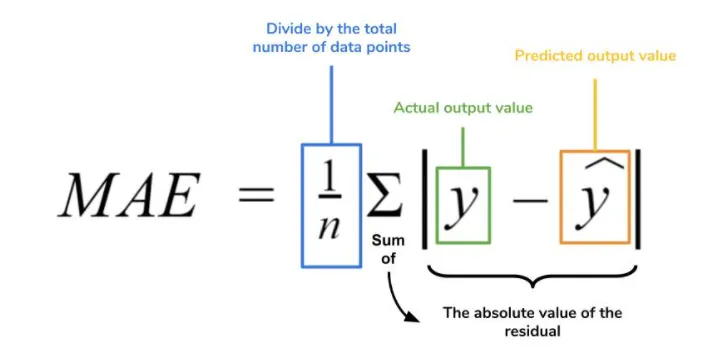

### ROOT MEAN SQUARED ERROR
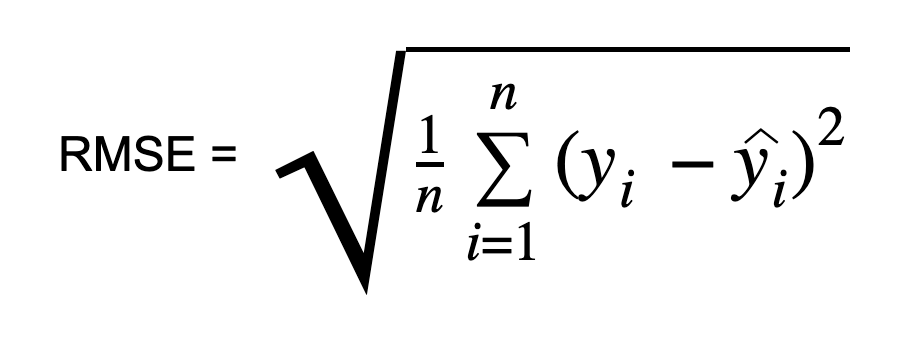

### Evaluation time
Let's see how does both of our models perform.

In [48]:
# Implement R2 Score, MAE and RMSE

class evaluate:

  def __init__(self,y_pred,y_test):
    self.y_pred = y_pred
    self.y_test = y_test

  def r2score(self):
    #Write code here
    ss_res = np.sum((self.y_test - self.y_pred) ** 2)
    ss_tot = np.sum((self.y_test - np.mean(self.y_test)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2


  def mae(self):
    #Write code here
    mae = np.mean(np.abs(self.y_test - self.y_pred))
    return mae

  def rmse(self):
    #write code here
    rmse = np.sqrt(np.mean((self.y_test - self.y_pred) ** 2))
    return rmse


In [49]:
# First calculate all the metrics for olslr_pred
eval = evaluate(olslr_pred, y_test)

In [50]:
r2 = eval.r2score()
r2

0.042179776427879845

In [53]:
mae = eval.mae()
mae

3.2353682995006396

In [55]:
rmse = eval.rmse()
rmse

4.21816233753514

In [57]:
# Now for gdlr_pred
evaluation = evaluate(gdlr_pred, y_test)

In [58]:
evaluation.r2score()

0.11869739093867637

In [59]:
evaluation.mae()

3.4020685020271175

In [60]:
evaluation.rmse()

4.04616711765047

# Part-3
In this part you'll have to answer the questions provided in the below google form:

[Questions](https://forms.gle/2KfpQNvmf5fd9MTw9)

**After Submitting the form, you are required to paste the screenshot of the form.**

## Steps to add screenshot:


1.   Take the screenshot of the submitted form.
2.   Now create a text block below this block in whichever IDE you are using, for example, if you are using VS Code, you will get 2 options below and above each block, Code and Markdown, chose the **Markdown** one.
3.   Now insert the image and run the cell.

### Voila!



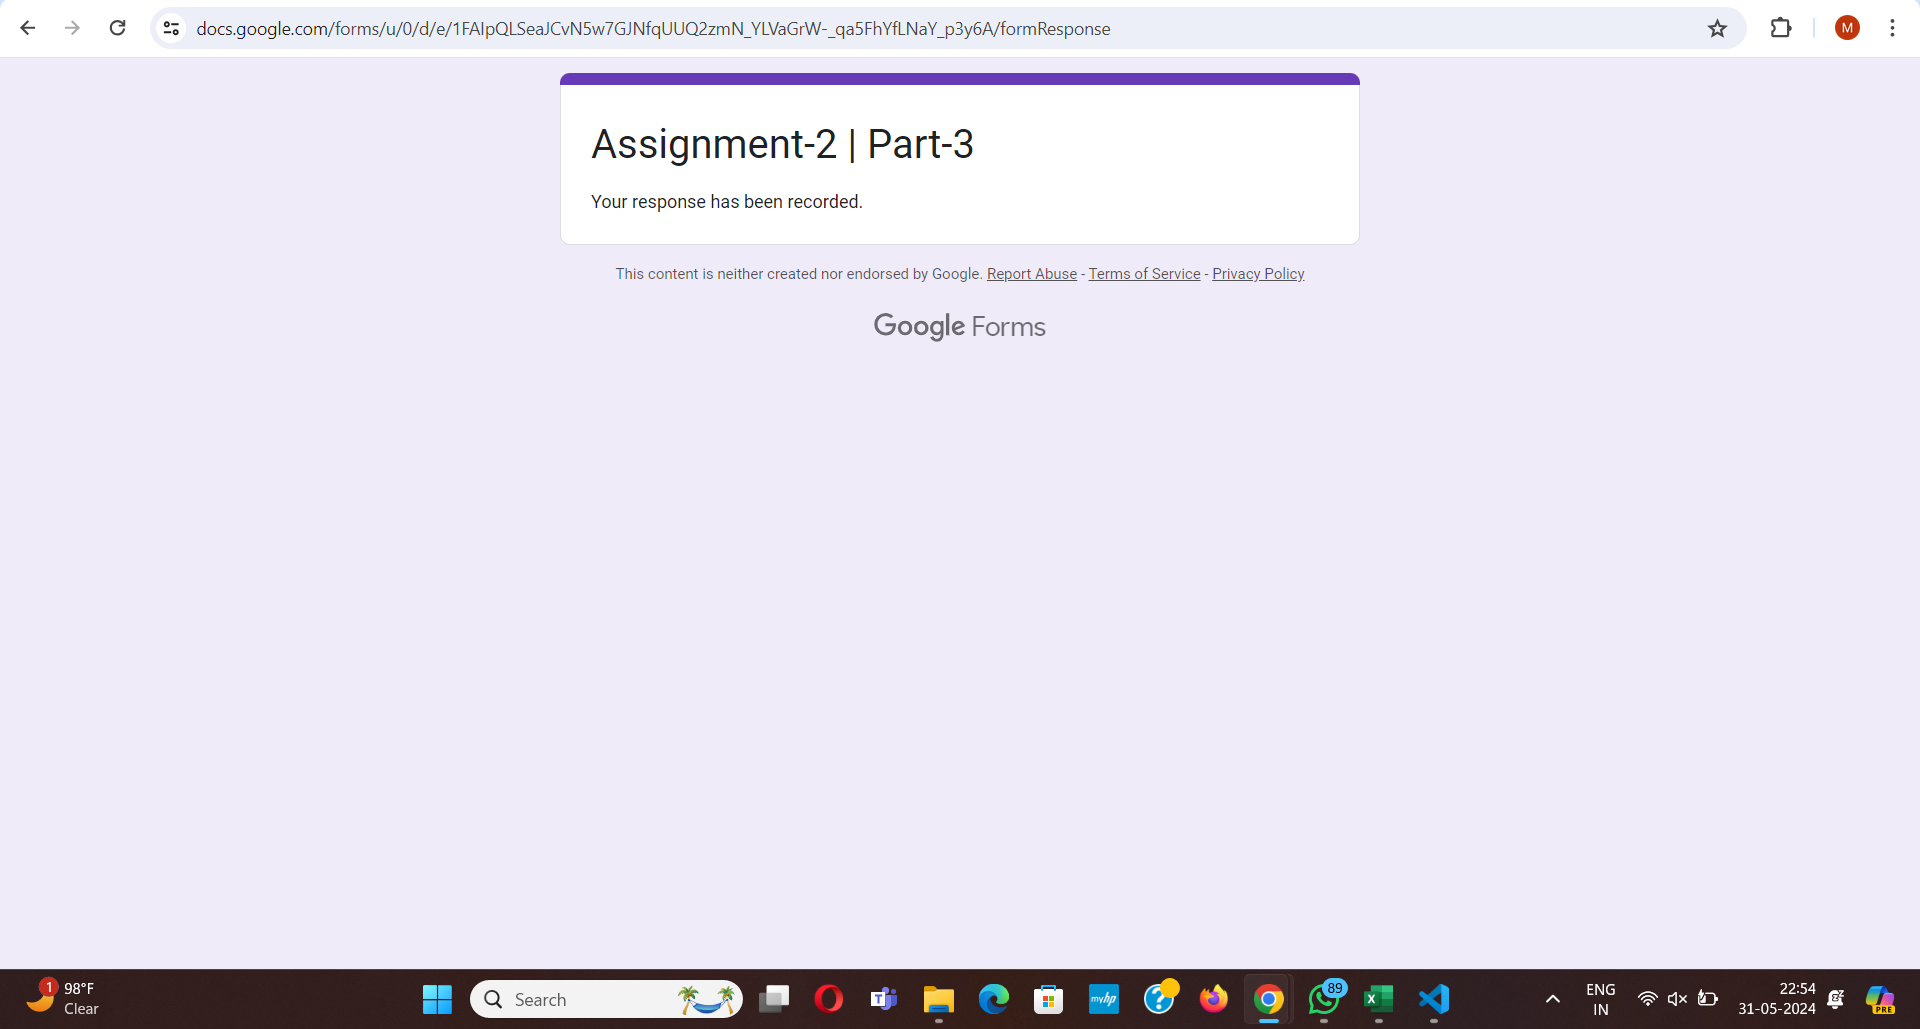